### Siamese 

##### Importing all the necessary Libraries

In [63]:
import os
import datetime
import sklearn
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.layers import Multiply
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import Input, LSTM, dot, Embedding, Conv1D, Flatten, Dense, Dropout, Activation, MaxPooling1D, ZeroPadding1D
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.regularizers import l1, l2
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

##### Reading the files

In [64]:
df = pd.read_csv(r"final_data_shuffle(50000).csv")

In [65]:
df

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,Tapatio Salsa Picante Hot Sauce Tortilla Chips,Organic Strawberries,No
1,54410,Dairy-Free Cheddar Style Shreds,Concentrate Chai Tea,No
2,95173,Finely Shredded Mozzarella Cheese,All-Natural Scottish-Style Porridge Oats High ...,No
3,75159,Dairy Free French Vanilla Coconut Milk Creamer,Low Carb Traditional Flour Tortillas,No
4,26965,Soft Giant Bread,Lil Snapper Kid Size Granny Smith Apples,Yes
...,...,...,...,...
99995,43822,Tonic Meyer Lemon,Habanero Cherry Beef Bar,Yes
99996,99956,Strawberry Organic Kefir,Banana,No
99997,75684,American Cheese Slices,Large Lemon,No
99998,26576,Kickin’ BBQ Chopped Salad,Assam Breakfast Black Tea Bags,Yes


In [66]:
df.head()

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,Tapatio Salsa Picante Hot Sauce Tortilla Chips,Organic Strawberries,No
1,54410,Dairy-Free Cheddar Style Shreds,Concentrate Chai Tea,No
2,95173,Finely Shredded Mozzarella Cheese,All-Natural Scottish-Style Porridge Oats High ...,No
3,75159,Dairy Free French Vanilla Coconut Milk Creamer,Low Carb Traditional Flour Tortillas,No
4,26965,Soft Giant Bread,Lil Snapper Kid Size Granny Smith Apples,Yes


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

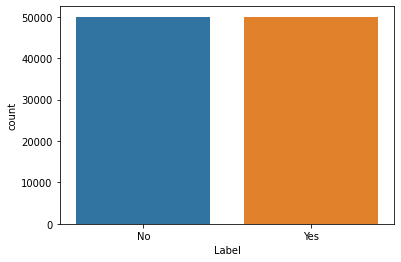

In [67]:
sns.countplot(df["Label"])

##### Changing the labels from Yes, No to 1 ,0

In [68]:
df["Label"] = df["Label"].apply(lambda x: "1" if x=="Yes" else 0)

In [69]:
df

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,Tapatio Salsa Picante Hot Sauce Tortilla Chips,Organic Strawberries,0
1,54410,Dairy-Free Cheddar Style Shreds,Concentrate Chai Tea,0
2,95173,Finely Shredded Mozzarella Cheese,All-Natural Scottish-Style Porridge Oats High ...,0
3,75159,Dairy Free French Vanilla Coconut Milk Creamer,Low Carb Traditional Flour Tortillas,0
4,26965,Soft Giant Bread,Lil Snapper Kid Size Granny Smith Apples,1
...,...,...,...,...
99995,43822,Tonic Meyer Lemon,Habanero Cherry Beef Bar,1
99996,99956,Strawberry Organic Kefir,Banana,0
99997,75684,American Cheese Slices,Large Lemon,0
99998,26576,Kickin’ BBQ Chopped Salad,Assam Breakfast Black Tea Bags,1


#### Train_Test_Split

##### Data Cleaning

In [70]:
pr_1 = pd.Series(df["Main_Product"]).astype(str)
pr_2 = pd.Series(df["Add_on_Product"]).astype(str)
pr_2

0                                     Organic Strawberries
1                                     Concentrate Chai Tea
2        All-Natural Scottish-Style Porridge Oats High ...
3                     Low Carb Traditional Flour Tortillas
4                 Lil Snapper Kid Size Granny Smith Apples
                               ...                        
99995                             Habanero Cherry Beef Bar
99996                                               Banana
99997                                          Large Lemon
99998                       Assam Breakfast Black Tea Bags
99999                                        Original Cola
Name: Add_on_Product, Length: 100000, dtype: object

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
### remove punctuation

def remove_punctuation(text) :
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct = "".join(no_punct)
    return words_wo_punct

# a = remove_punctuation('Myt? .t. name is ro,s')

In [73]:
pr_1

0        Tapatio Salsa Picante Hot Sauce Tortilla Chips
1                       Dairy-Free Cheddar Style Shreds
2                     Finely Shredded Mozzarella Cheese
3        Dairy Free French Vanilla Coconut Milk Creamer
4                                      Soft Giant Bread
                              ...                      
99995                                 Tonic Meyer Lemon
99996                          Strawberry Organic Kefir
99997                            American Cheese Slices
99998                         Kickin’ BBQ Chopped Salad
99999     Chicken, Broccoli & Cheddar Frozen Sandwiches
Name: Main_Product, Length: 100000, dtype: object

In [74]:
from string import punctuation


def Process_column_punctuation(column) :
    
    for index, sentence in column.items() :
        a = remove_punctuation(sentence)
        column[index] = a
    
    return column

maxlength = Process_column_punctuation(pr_1)
maxlength = Process_column_punctuation(pr_2)

In [75]:
maxlength

0                                     Organic Strawberries
1                                     Concentrate Chai Tea
2        AllNatural ScottishStyle Porridge Oats High Fi...
3                     Low Carb Traditional Flour Tortillas
4                 Lil Snapper Kid Size Granny Smith Apples
                               ...                        
99995                             Habanero Cherry Beef Bar
99996                                               Banana
99997                                          Large Lemon
99998                       Assam Breakfast Black Tea Bags
99999                                        Original Cola
Name: Add_on_Product, Length: 100000, dtype: object

In [76]:
pr_2

0                                     Organic Strawberries
1                                     Concentrate Chai Tea
2        AllNatural ScottishStyle Porridge Oats High Fi...
3                     Low Carb Traditional Flour Tortillas
4                 Lil Snapper Kid Size Granny Smith Apples
                               ...                        
99995                             Habanero Cherry Beef Bar
99996                                               Banana
99997                                          Large Lemon
99998                       Assam Breakfast Black Tea Bags
99999                                        Original Cola
Name: Add_on_Product, Length: 100000, dtype: object

In [77]:
df["Main_Product"] = pr_1
df["Add_on_Product"] = pr_2

In [78]:
df

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,Tapatio Salsa Picante Hot Sauce Tortilla Chips,Organic Strawberries,0
1,54410,DairyFree Cheddar Style Shreds,Concentrate Chai Tea,0
2,95173,Finely Shredded Mozzarella Cheese,AllNatural ScottishStyle Porridge Oats High Fi...,0
3,75159,Dairy Free French Vanilla Coconut Milk Creamer,Low Carb Traditional Flour Tortillas,0
4,26965,Soft Giant Bread,Lil Snapper Kid Size Granny Smith Apples,1
...,...,...,...,...
99995,43822,Tonic Meyer Lemon,Habanero Cherry Beef Bar,1
99996,99956,Strawberry Organic Kefir,Banana,0
99997,75684,American Cheese Slices,Large Lemon,0
99998,26576,Kickin’ BBQ Chopped Salad,Assam Breakfast Black Tea Bags,1


In [79]:
### tokenize

def tokenize(text) :
    split=re.split("\W+", text) # "\W+"  splits on one or more non-word character
    return split

df['Main_Product'] = df['Main_Product'].apply(lambda x: tokenize(x.lower()))
df['Add_on_Product'] = df['Add_on_Product'].apply(lambda x: tokenize(x.lower()))
df.head()

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,"[tapatio, salsa, picante, hot, sauce, tortilla...","[organic, strawberries]",0
1,54410,"[dairyfree, cheddar, style, shreds]","[concentrate, chai, tea]",0
2,95173,"[finely, shredded, mozzarella, cheese]","[allnatural, scottishstyle, porridge, oats, hi...",0
3,75159,"[dairy, free, french, vanilla, coconut, milk, ...","[low, carb, traditional, flour, tortillas]",0
4,26965,"[soft, giant, bread]","[lil, snapper, kid, size, granny, smith, apples]",1


In [80]:
### maximum length of the product

def maxlength(series) :
    maxlength = 0
    word = ""
    for i in series :
        maxi = len(i)
        if maxi > maxlength :
            maxlength = maxi
            word = i
    print(f"Longest word is  {word}")
        # print(i)
    
    return maxlength

# maxlength(df['Main_Product'])
maxlent = maxlength(df['Main_Product'])
maxlent = maxlength(df['Add_on_Product'])
     
maxlent

Longest word is  ['a', 'golden', 'crust', 'surrounding', 'pieces', 'of', 'all', 'white', 'meat', 'chicken', 'peas', 'carrots', 'celery', 'and', 'onions', 'in', 'a', 'gravy', 'made', 'with', 'real', 'cream', 'white', 'meat', 'chicken', 'pot', 'pie']
Longest word is  ['grilled', 'white', 'meat', 'chicken', 'in', 'an', 'apple', 'reduction', 'with', 'cranberries', 'french', 'cut', 'green', 'beans', 'carrots', 'and', 'whole', 'wheat', 'orzo', 'pasta', 'apple', 'cranberry', 'chicken']


23

In [81]:

### Remove the stop words

stopwords = nltk.corpus.stopwords.words('english')
# print(len(stopwords))
# Total 179 stopwords are there in english

def remove_stopwords(text) :
    text = [word for word in text if word not in stopwords]
    return text


df['Main_Product'] = df['Main_Product'].apply(lambda x: remove_stopwords(x))
df['Add_on_Product'] = df['Add_on_Product'].apply(lambda x: remove_stopwords(x))
df.head()

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,"[tapatio, salsa, picante, hot, sauce, tortilla...","[organic, strawberries]",0
1,54410,"[dairyfree, cheddar, style, shreds]","[concentrate, chai, tea]",0
2,95173,"[finely, shredded, mozzarella, cheese]","[allnatural, scottishstyle, porridge, oats, hi...",0
3,75159,"[dairy, free, french, vanilla, coconut, milk, ...","[low, carb, traditional, flour, tortillas]",0
4,26965,"[soft, giant, bread]","[lil, snapper, kid, size, granny, smith, apples]",1


In [82]:
type(df["Main_Product"][1][0])

str

In [83]:
### Remove numbers

def remove_numbers(text) :
    sentence = " ".join(text)
    # print(sentence)
    b = ' '.join([word for word in sentence.split() if not word.isdigit()])
    # print(text)
    return b

df['Main_Product'] = df['Main_Product'].apply(lambda x: remove_numbers(x))
df['Add_on_Product'] = df['Add_on_Product'].apply(lambda x: remove_numbers(x))
df.head()

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,tapatio salsa picante hot sauce tortilla chips,organic strawberries,0
1,54410,dairyfree cheddar style shreds,concentrate chai tea,0
2,95173,finely shredded mozzarella cheese,allnatural scottishstyle porridge oats high fi...,0
3,75159,dairy free french vanilla coconut milk creamer,low carb traditional flour tortillas,0
4,26965,soft giant bread,lil snapper kid size granny smith apples,1


##### Text preprocessing

In [84]:
combined = np.concatenate([df['Main_Product'], df['Add_on_Product']])
len(combined)

200000

In [85]:
combined

array(['tapatio salsa picante hot sauce tortilla chips',
       'dairyfree cheddar style shreds',
       'finely shredded mozzarella cheese', ..., 'large lemon',
       'assam breakfast black tea bags', 'original cola'], dtype=object)

padding sequences to a max embedding lenbgth of 100 dim and max len of the sequence to 150

In [86]:
def word_to_index(all_words):
    lines = []
    for key in combined :
        lines.append(key)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    vocab = len(tokenizer.word_index) + 1
    return(tokenizer.word_index), vocab

word2index, vocab_size = word_to_index(combined)
index2word = dict((v, k) for k,v in word2index.items())

In [87]:
vocab_size

6360

In [88]:
index2word

{1: 'organic',
 2: 'cheese',
 3: 'chocolate',
 4: 'free',
 5: 'avocado',
 6: 'milk',
 7: 'yogurt',
 8: 'original',
 9: 'whole',
 10: 'cream',
 11: 'lemon',
 12: 'butter',
 13: 'juice',
 14: 'mix',
 15: 'chips',
 16: 'fruit',
 17: 'vanilla',
 18: 'bread',
 19: 'banana',
 20: 'coffee',
 21: 'chicken',
 22: 'hass',
 23: 'tea',
 24: 'cheddar',
 25: 'large',
 26: 'strawberry',
 27: 'bar',
 28: 'fat',
 29: 'strawberries',
 30: 'greek',
 31: 'garlic',
 32: 'honey',
 33: 'white',
 34: 'dark',
 35: 'drink',
 36: 'ice',
 37: 'sugar',
 38: 'bars',
 39: 'natural',
 40: 'water',
 41: 'sweet',
 42: 'pizza',
 43: 'cookies',
 44: 'style',
 45: 'spinach',
 46: 'gluten',
 47: 'baby',
 48: 'cereal',
 49: 'peanut',
 50: 'almond',
 51: 'potato',
 52: 'crackers',
 53: 'onion',
 54: 'orange',
 55: 'coconut',
 56: 'apple',
 57: 'sauce',
 58: 'blend',
 59: 'roasted',
 60: 'frozen',
 61: 'wheat',
 62: 'salt',
 63: 'light',
 64: 'black',
 65: 'classic',
 66: 'corn',
 67: 'granola',
 68: 'green',
 69: 'dressing',

In [89]:
### Function for vectorizing the texts to sequences and pad them

max_length = maxlent

def tokenize(sen) :
    t = Tokenizer()                        
    t.fit_on_texts(sen)                                                                                                                                     
    sequences = t.texts_to_sequences(sen)                                                                                                                                                                                                                                                                    
    # print(f"{sequences}")
    padded = pad_sequences(sequences, maxlen=max_length, padding="post")
    vocab_size = len(t.word_index) + 1
    # print(padded)
    return padded, t

In [90]:
# b = tokenize(["My name is Roshan Rai"])
# print(b)
scale = lambda x : tokenize(x)
combined_vector, tok = scale(combined)

In [91]:
print(tok)

In [92]:
vocab_size

6360

In [93]:
combined_vector

array([[3273,  127,  738, ...,    0,    0,    0],
       [1151,   24,   44, ...,    0,    0,    0],
       [ 684,  109,  160, ...,    0,    0,    0],
       ...,
       [  25,   11,    0, ...,    0,    0,    0],
       [1702,  144,   64, ...,    0,    0,    0],
       [   8,  516,    0, ...,    0,    0,    0]])

In [94]:
len(combined_vector)

200000

In [95]:
(len(combined_vector)/2)

100000.0

In [96]:
combined_vector[0]

array([3273,  127,  738,   70,   57,  131,   15,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [97]:
len(combined_vector[0])

23

In [98]:
pr_1 = combined_vector[0:int((len(combined_vector)/2))]
pr_2 = combined_vector[int((len(combined_vector)/2)):]

In [99]:
len(pr_1)

100000

##### Loading Glove word embedding

In [100]:
embeddings_index = {}
glovefile = open("D:\Machine Learning\Embeddings\Glove Wikipedia\glove.6B.200d.txt", 'r', encoding='utf-8')
for line in glovefile :
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
glovefile.close()

print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


In [101]:
embeddings_index['food']

array([ 0.27271  ,  0.05956  , -0.14829  ,  0.16065  , -0.30424  ,
        0.29136  , -0.30582  , -0.086042 , -0.33393  ,  0.026198 ,
       -0.0091113,  0.44997  ,  0.40157  ,  0.69766  , -0.58233  ,
        0.32367  , -0.25852  ,  0.43356  ,  0.32783  ,  0.61685  ,
        0.011943 ,  3.1218   , -0.2277   ,  0.64489  ,  0.44525  ,
        0.40523  , -0.36766  ,  0.36327  , -0.056877 ,  0.16333  ,
        0.39659  ,  0.10823  ,  0.12022  , -0.58039  ,  0.59437  ,
        0.22913  ,  0.081255 ,  0.17607  , -0.13449  , -0.029875 ,
        0.37063  ,  0.31038  , -0.076044 , -0.014933 , -0.050792 ,
       -0.59233  ,  1.2182   ,  0.067015 , -0.12176  ,  0.50952  ,
       -0.032926 ,  0.34082  ,  0.050888 ,  0.48488  , -0.11861  ,
       -0.55552  , -0.39904  , -0.23847  ,  0.32563  ,  0.42207  ,
        0.27588  ,  0.50878  , -0.49494  ,  1.0121   , -0.1347   ,
        0.23952  ,  0.28137  , -0.39123  , -0.07747  , -0.12426  ,
        0.73129  ,  0.85536  , -0.57769  , -0.35689  ,  0.2284

In [102]:
glovefile

<_io.TextIOWrapper name='D:\\Machine Learning\\Embeddings\\Glove Wikipedia\\glove.6B.200d.txt' mode='r' encoding='utf-8'>

In [103]:
len(tok.word_index) +1

6360

In [104]:
### Creating embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((vocab_size, 200))
for words, index in tok.word_index.items() :
    print(words)
    embedding_vector = embeddings_index.get(words)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

organic
cheese
chocolate
free
avocado
milk
yogurt
original
whole
cream
lemon
butter
juice
mix
chips
fruit
vanilla
bread
banana
coffee
chicken
hass
tea
cheddar
large
strawberry
bar
fat
strawberries
greek
garlic
honey
white
dark
drink
ice
sugar
bars
natural
water
sweet
pizza
cookies
style
spinach
gluten
baby
cereal
peanut
almond
potato
crackers
onion
orange
coconut
apple
sauce
blend
roasted
frozen
wheat
salt
light
black
classic
corn
granola
green
dressing
hot
mini
blueberry
bag
yellow
rice
caramel
cherry
cinnamon
turkey
raspberries
salad
snack
sparkling
red
grain
flavored
raspberry
pack
limes
chip
roast
sea
protein
italian
oil
pie
french
candy
berry
pepper
extra
medium
bananas
ground
beef
creamy
nut
baked
shredded
mango
pure
sliced
sandwich
low
vegetable
spread
soda
flavor
bean
cranberry
size
lime
brown
beverage
crunch
lowfat
salsa
premium
crust
soft
tortilla
dip
sausage
snacks
slices
oatmeal
popcorn
ginger
reduced
cake
cookie
thin
fresh
breakfast
breast
salted
olive
veggie
energy
ham
le

In [105]:
embedding_matrix[2] ### Word vector of coffee of length 200

array([-0.33805999,  0.12662999,  0.56019002,  0.45111001,  0.50303   ,
       -0.1061    , -0.48638001, -0.41042   , -0.072911  , -0.72465003,
        0.60293001,  0.11822   ,  0.39464   ,  0.80457002, -1.31280005,
        1.05410004,  0.62580001, -0.21477   ,  0.48438001,  0.15076999,
       -0.51309001,  0.66645002,  0.44376001, -0.16132   ,  0.26084   ,
       -0.11566   , -0.064284  ,  0.10801   , -0.47328001,  0.34371999,
        1.24860001,  0.039181  , -0.067488  , -0.13462   ,  0.14906999,
       -0.55045003, -0.3132    , -0.19627   , -0.32887   ,  0.67013001,
        0.30566001, -0.37364   ,  0.51148999,  0.20018999, -0.69810998,
       -0.31843001,  1.17700005, -0.20429   , -0.41966   ,  0.79414999,
        0.060631  , -0.010812  ,  0.084107  ,  0.96785998,  0.38578001,
        0.27456   , -0.17552   ,  0.31777999,  0.88853002, -0.30423999,
        0.07136   ,  0.35023999, -0.26363   , -0.10728   , -0.45543   ,
       -0.12808   , -0.018225  ,  0.26989001,  0.39976001, -0.45

In [106]:
embedding_matrix.shape

(6360, 200)

##### Split into train and test set

In [107]:
y = pd.Series(df['Label']).to_numpy()
main = pr_1
add_on = pr_2

In [108]:
print(f'y = {y.shape}')
print(f'main : {main.shape}')
print(f'add_on : {add_on.shape}')

y = (100000,)
main : (100000, 23)
add_on : (100000, 23)


In [109]:
df

,Unnamed: 0,Main_Product,Add_on_Product,Label
0,61674,tapatio salsa picante hot sauce tortilla chips,organic strawberries,0
1,54410,dairyfree cheddar style shreds,concentrate chai tea,0
2,95173,finely shredded mozzarella cheese,allnatural scottishstyle porridge oats high fi...,0
3,75159,dairy free french vanilla coconut milk creamer,low carb traditional flour tortillas,0
4,26965,soft giant bread,lil snapper kid size granny smith apples,1
...,...,...,...,...
99995,43822,tonic meyer lemon,habanero cherry beef bar,1
99996,99956,strawberry organic kefir,banana,0
99997,75684,american cheese slices,large lemon,0
99998,26576,kickin bbq chopped salad,assam breakfast black tea bags,1


In [110]:
X_train_p1,X_valid_p1, X_train_p2, X_valid_p2, y_train, y_valid = train_test_split(main, add_on, y, test_size=0.20, random_state=12)

In [111]:
X_train_p1 = np.float32(X_train_p1)
X_train_p2 = np.float32(X_train_p2)
X_valid_p1 = np.float32(X_valid_p1)
X_valid_p2 = np.float32(X_valid_p2)
y_train = np.float32(y_train)
y_valid = np.float32(y_valid)

In [112]:

print(f'X_train_p1 : {(X_train_p1.shape)}')
print(f'X_train_p2 : {(X_train_p2.shape)}')
print(f'X_valid_p1 : {(X_valid_p1.shape)}')
print(f'X_valid_p2 : {(X_valid_p2.shape)}')
print(f'y_train : {(y_train.shape)}')
print(f'y_valid : {(y_valid.shape)}')

X_train_p1 : (80000, 23)
X_train_p2 : (80000, 23)
X_valid_p1 : (20000, 23)
X_valid_p2 : (20000, 23)
y_train : (80000,)
y_valid : (20000,)


In [113]:
X_train_p1

array([[9.000e+00, 6.100e+01, 7.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.900e+02, 1.574e+03, 2.290e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.200e+01, 3.067e+03, 4.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.537e+03, 3.870e+02, 5.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.037e+03, 5.100e+01, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 5.070e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

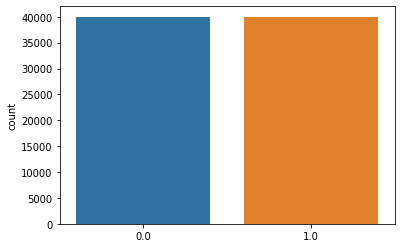

In [114]:
sns.countplot(y_train)

#### Defining the Model

Intermediate Merge

In [115]:
# input_1 = Input(shape=(X_train_p1.shape[1],))
# input_2 = Input(shape=(X_train_p2.shape[1],))

# common_embed = Embedding(input_dim =vocab_size,
#                          output_dim=200,
#                          weights=[embedding_matrix],
#                          input_length=27,
#                          trainable=False) 

# lstm_1 = common_embed(input_1)
# lstm_2 = common_embed(input_2)

# common_lstm = LSTM(150,
#                    return_sequences=True, 
#                    activation='relu',
#                    kernel_regularizer=l2(0.01),
#                    bias_regularizer=l2(0.01),
#                    activity_regularizer=l2(0.01))

# vector_1 = common_lstm(lstm_1)
# vector_1 = Flatten(name='flatten1')(vector_1)

# vector_2 = common_lstm(lstm_2)
# vector_2 = Flatten(name='flatten2')(vector_2)

# #Intermediate merge start
# conc = dot([vector_1, vector_2],
#            axes=1,
#            normalize=True,
#            name='dot')

# x = Dense(100,
#           activation='relu',
#           name='conc_layer')(conc)

# x = Dropout(0.2)(x)
# out = Dense(1, activation="sigmoid", name = 'out')(x)

# siamese_lstm = Model([input_1, input_2], out)

# siamese_lstm.compile(loss='binary_crossentropy',
#                      optimizer='adam',
#                      metrics=['accuracy'])

# logdir = os.path.join("logs-lstm",
#                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard = TensorBoard(logdir, histogram_freq=1)
# callbacks = [EarlyStopping(monitor='val_loss',patience=2, verbose=1, mode='auto'),
#              tensorboard]

 Late Merge

In [116]:
input_1 = Input(shape=(X_train_p1.shape[1],))
input_2 = Input(shape=(X_train_p1.shape[1],))


common_embed = Embedding(input_dim =vocab_size,
                         weights=[embedding_matrix],
                         trainable=False,
                         output_dim=200,
                         input_length=27) 


lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)

common_lstm = LSTM(150,
                   return_sequences=True, 
                   activation='relu',
                   kernel_regularizer=l2(0.01),
                   bias_regularizer=l2(0.01),
                   activity_regularizer=l2(0.01))

vector_1 = common_lstm(lstm_1)
vector_1 = Flatten(name='flatten1')(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten(name='flatten2')(vector_2)

#Late merge 
x_1 = Dense(18, activation='relu', name='conc_Layer_1')(vector_1)

x_2 = Dense(18, activation='relu', name='conc_Layer_2')(vector_2)

x_1 = Dropout(0.01)(x_1)
x_2 = Dropout(0.01)(x_2)


conc = dot([x_1, x_2], axes=1, normalize=True, name='dot')

out = Dense(1, activation='sigmoid', name='out')(conc)

siamese_lstm = Model([input_1, input_2], out)

siamese_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

logdir = os.path.join("logs-lstm",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(logdir, histogram_freq=1)
callbacks = [EarlyStopping(monitor='val_loss',patience=5, verbose=1, mode='auto'),
             tensorboard]

In [117]:
X_train_p1.shape[1]

23

In [118]:
siamese_lstm.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 23)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 23)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 23, 200)      1272000     input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 23, 150)      210600      embedding_1[0][0]          

In [119]:
y_train.shape

(80000,)

#### Training the Siamese LSTM

In [120]:
history_lstm = siamese_lstm.fit([X_train_p1, X_train_p2],
                                y_train,
                                validation_split=0.1,
                                batch_size=256,
                                epochs=25,
                                callbacks=callbacks,
                                verbose=1)

Epoch 1/25


KeyboardInterrupt: 

In [ ]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']

C:\Users\HP\AppData\Local\Temp\ipykernel_21628\3623744548.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', color='red', label='Training Loss')


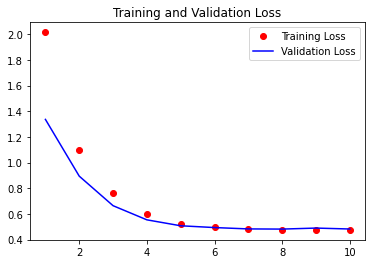

C:\Users\HP\AppData\Local\Temp\ipykernel_21628\3623744548.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color='red', label='Training Accuracy')


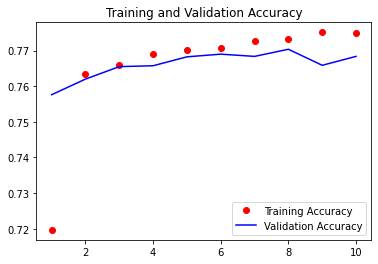

In [ ]:

epochs = range(1, len(loss) + 1 )

plt.figure()

plt.plot(epochs, loss, 'bo', color='red', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title("Training and Validation Loss")

plt.legend()
plt.show()


plt.figure()


plt.plot(epochs, accuracy, 'bo', color='red', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.legend()

plt.show()


In [ ]:
siamese_lstm.save("Siamese_LSTM_Intermediate_Merge_100000_entries_25_epochs.h5")

In [ ]:
siamese_lstm.evaluate([X_valid_p1, X_valid_p2], y_valid)

625/625 [==============================] - 52s 83ms/step - loss: 0.4713 - accuracy: 0.7752


[0.47134873270988464, 0.7752000093460083]

In [ ]:
y_pred_lstm = siamese_lstm.predict([X_valid_p1, X_valid_p2], verbose=1)


625/625 [==============================] - 32s 42ms/step


In [ ]:
y_pred_lstm

array([[0.7628857 ],
       [0.08653421],
       [0.7376808 ],
       ...,
       [0.6907228 ],
       [0.46298212],
       [0.06327137]], dtype=float32)

In [ ]:
data_frame = pd.DataFrame(y_pred_lstm, columns=['Y_predicted'])
data_frame['actual'] = pd.DataFrame(y_valid)

In [ ]:
data_frame

,Y_predicted,actual
0,0.762886,1.0
1,0.086534,0.0
2,0.737681,1.0
3,0.770948,0.0
4,0.728121,0.0
...,...,...
19995,0.711991,1.0
19996,0.714599,1.0
19997,0.690723,1.0
19998,0.462982,1.0


In [ ]:
a = np.array([[1726, 2163, 1855, 3794,   26, 3795,    7,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0]])

In [ ]:
print(dir(a))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

In [ ]:
pr_1_test = tok.sequences_to_texts(X_valid_p1)
pr_2_test = tok.sequences_to_texts(X_valid_p2)

In [ ]:
data_frame['Main_Product'] = pd.DataFrame(pr_1_test)
data_frame['Add_On_Product'] = pd.DataFrame(pr_2_test)

In [ ]:
data_frame_reorder = data_frame[["Main_Product", "Add_On_Product", "Y_predicted", "actual"]]

In [ ]:
data_frame_reorder

,Main_Product,Add_On_Product,Y_predicted,actual
0,white pita,tzatziki,0.762886,1.0
1,organic apple juice boxes,organic strawberries,0.086534,0.0
2,steel cut apple pear pecan flavor instant oatmeal,extra large black bean tostitos chips,0.737681,1.0
3,steamy vegetables super sweet corn steamables,mango yogurt,0.770948,0.0
4,supremely spicy hummus,ground sumac,0.728121,0.0
...,...,...,...,...
19995,lebanon bologna,italian style breadcrumbs,0.711991,1.0
19996,natural cheese pizza,go ice raspberry,0.714599,1.0
19997,minty sweet twist xylitol sugarfree gum,traditional balsamic vinegar modena,0.690723,1.0
19998,organic lemon,uncured genoa salami,0.462982,1.0


In [ ]:
data_frame_reorder.to_csv("Results for Intermediate merge with 800000 entries with 25 epochs.csv")

##### Result and Analysis

AUC for Siamese LSTM: 82.69789058496245

Accuracy for Siamese LSTM: 77.52

[[6144 3868]
 [ 628 9360]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

         0.0       0.91      0.61      0.73     10012
         1.0       0.71      0.94      0.81      9988

    accuracy                           0.78     20000
   macro avg       0.81      0.78      0.77     20000
weighted avg       0.81      0.78      0.77     20000



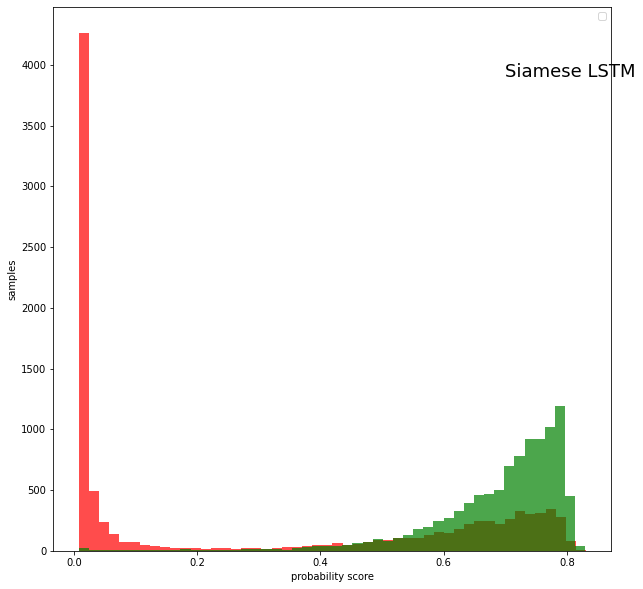

In [ ]:
#for siamese_lstm
auc = sklearn.metrics.roc_auc_score(y_valid, y_pred_lstm)*100
acc = sklearn.metrics.accuracy_score(y_valid, y_pred_lstm.ravel() > 0.5)*100
print('AUC for Siamese LSTM: %s\n' % auc)
print('Accuracy for Siamese LSTM: %s\n' % acc)

print(sklearn.metrics.confusion_matrix(y_valid, y_pred_lstm.ravel() > 0.5))
print(classification_report(y_valid, y_pred_lstm.ravel() > 0.5))

plt.figure(figsize=(10,10))
plt.hist(y_pred_lstm[y_valid == 0], bins=50, color='red', alpha=0.7);
plt.hist(y_pred_lstm[y_valid == 1], bins=50, color='green', alpha=0.7);
plt.text(0.7, 3900, "Siamese LSTM", fontsize=18)
plt.xlabel("probability score")
plt.ylabel("samples")

plt.legend()
# plt.show()

#### Recommending Products

In [ ]:
df['Main_Product']

0        tapatio salsa picante hot sauce tortilla chips
1                        dairyfree cheddar style shreds
2                     finely shredded mozzarella cheese
3        dairy free french vanilla coconut milk creamer
4                                      soft giant bread
                              ...                      
99995                                 tonic meyer lemon
99996                          strawberry organic kefir
99997                            american cheese slices
99998                          kickin bbq chopped salad
99999        chicken broccoli cheddar frozen sandwiches
Name: Main_Product, Length: 100000, dtype: object

In [ ]:
def products_array(products) :
    arr = []
    length = 0
    for i in products :
        if i not in arr :
            arr.append(i)
            length += 1
    return arr, length

In [ ]:
main_product, main_len = products_array(df['Main_Product'])
com_product, com_len = products_array(df['Add_on_Product'])

print(f'The length of main products is {main_len}')
print(f'The length of com products is {com_len}')

The length of main products is 21972
The length of com products is 17481


In [ ]:
main_product = pd.DataFrame(main_product[:17481], columns=['main'])
com_product = pd.DataFrame(com_product, columns=['comple'])

In [ ]:
products = pd.concat([main_product, com_product], axis=1)

In [ ]:
products

,main,comple
0,tapatio salsa picante hot sauce tortilla chips,organic strawberries
1,dairyfree cheddar style shreds,concentrate chai tea
2,finely shredded mozzarella cheese,allnatural scottishstyle porridge oats high fi...
3,dairy free french vanilla coconut milk creamer,low carb traditional flour tortillas
4,soft giant bread,lil snapper kid size granny smith apples
...,...,...
17476,kale ceasar salad kit,strawberry gem fruit spread
17477,sugar free concord grape jam,maple brown sugar squarefuls cereal
17478,organic red thai curry,oh fudge
17479,perkys crunchy flax cereal chia,italian salad dressing recipe mix


In [ ]:
products.to_csv('unique_products.csv', index=False)
products.to_csv('unique_products_with_index.csv', index=True)

In [ ]:
data = pd.read_csv('unique_products_with_index.csv')

In [ ]:
data = data.rename(columns={"Unnamed: 0" : "Id"})

In [ ]:
data

,Id,main,comple
0,0,tapatio salsa picante hot sauce tortilla chips,organic strawberries
1,1,dairyfree cheddar style shreds,concentrate chai tea
2,2,finely shredded mozzarella cheese,allnatural scottishstyle porridge oats high fi...
3,3,dairy free french vanilla coconut milk creamer,low carb traditional flour tortillas
4,4,soft giant bread,lil snapper kid size granny smith apples
...,...,...,...
17476,17476,kale ceasar salad kit,strawberry gem fruit spread
17477,17477,sugar free concord grape jam,maple brown sugar squarefuls cereal
17478,17478,organic red thai curry,oh fudge
17479,17479,perkys crunchy flax cereal chia,italian salad dressing recipe mix


In [ ]:
target_products_dict = pd.Series(data['main'], index=data["Id"]).to_dict()
print(len(target_products_dict))

17481


In [ ]:
target_products_dict

{0: 'tapatio salsa picante hot sauce tortilla chips',
 1: 'dairyfree cheddar style shreds',
 2: 'finely shredded mozzarella cheese',
 3: 'dairy free french vanilla coconut milk creamer',
 4: 'soft giant bread',
 5: 'low fat milk',
 6: 'macaroon truf',
 7: 'drycured prosciutto',
 8: 'crystallized ginger dark chocolate bar',
 9: 'salted butter',
 10: 'triscuit baked whole grain wheat rosemary olive oil',
 11: 'original strawberrystrawberry banana variety pack low fat yogurt',
 12: 'ho hos cakes',
 13: 'coco crunch sprouted granola',
 14: 'orange mango super drink',
 15: 'belvita cranberry orange breakfast bar',
 16: 'lean gourmet five cheese lasagna',
 17: 'poptarts frosted brown sugar cinnamon pastries',
 18: 'steamfresh selects frozen long grain white rice mixed vegetables',
 19: 'crisps russian rye',
 20: 'saltfree blend lemon pepper',
 21: 'salted caramel cold brew coffee',
 22: 'tomato juice',
 23: 'chianti red wine vinegar',
 24: 'grape sports drink',
 25: 'dairy free gluten free c

target_products_dict.update(pd.Series(X_test.title_addon.values,index=X_test.id_addon).to_dict())

In [ ]:
# target_products_dict = target_products_dict.update(pd.Series(data['comple'], index=data['Id']))
# target_products_dict

In [ ]:
candidate_products_dict = target_products_dict

#### Tokenizoing the target and candidate products

In [ ]:
seq = data['main'].to_list() + data['comple'].to_list()

t = Tokenizer(lower=True, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
t.fit_on_texts(seq)

test_set_main = t.texts_to_sequences(list(target_products_dict.values()))
target_products = pad_sequences(test_set_main, maxlen=max_length, padding='post')

test_set_addon = t.texts_to_sequences(list(candidate_products_dict.values()))
candidate_products = pad_sequences(test_set_addon, maxlen=max_length, padding='post')

In [ ]:
target_products

array([[3123,  107,  686, ...,    0,    0,    0],
       [ 984,   25,   38, ...,    0,    0,    0],
       [ 672,  120,  156, ...,    0,    0,    0],
       ...,
       [   1,   73,  509, ...,    0,    0,    0],
       [3108,  141,  233, ...,    0,    0,    0],
       [  30,    4,  111, ...,    0,    0,    0]])

#### Saving the weights for the target and candidate products

In [ ]:
siamese_lstm.input[0]

<KerasTensor: shape=(None, 23) dtype=float32 (created by layer 'input_1')>

In [ ]:
m2 = Model(inputs=siamese_lstm.input[0], outputs=siamese_lstm.get_layer('flatten1').output)
target_products_weights = m2.predict(target_products)

In [ ]:
m2 = Model(inputs=siamese_lstm.input[0], outputs=siamese_lstm.get_layer('flatten1').output)
candidate_products_weights = m2.predict(candidate_products)

#### Calculating the cosine similarity between the two vector of target and candidate products

In [ ]:
dot_product = sklearn.metrics.pairwise.cosine_similarity(target_products_weights, Y=target_products_weights, dense_output=True)

In [ ]:
dot_product

array([[0.99999994, 0.78256685, 0.8200525 , ..., 0.8802472 , 0.7040571 ,
        0.8365082 ],
       [0.78256685, 0.99999994, 0.8028352 , ..., 0.82842946, 0.7537106 ,
        0.8079917 ],
       [0.8200525 , 0.8028352 , 1.0000001 , ..., 0.8048708 , 0.8462565 ,
        0.8038326 ],
       ...,
       [0.8802472 , 0.82842946, 0.8048708 , ..., 0.9999999 , 0.67976886,
        0.8086557 ],
       [0.7040571 , 0.7537106 , 0.8462565 , ..., 0.67976886, 1.0000002 ,
        0.76847565],
       [0.8365082 , 0.8079917 , 0.8038326 , ..., 0.8086557 , 0.76847565,
        0.99999994]], dtype=float32)

##### Creating a dataframe

In [ ]:
dot_product_df = pd.DataFrame(dot_product, index = target_products_dict.keys(), columns = target_products_dict.keys())

In [ ]:
dot_product_df

,0,1,2,3,4,5,6,7,8,9,...,17471,17472,17473,17474,17475,17476,17477,17478,17479,17480
0,1.000000,0.782567,0.820053,0.767235,0.795492,0.673682,0.737599,0.805985,0.771013,0.686058,...,0.728551,0.829258,0.733304,0.775889,0.854415,0.795419,0.747721,0.880247,0.704057,0.836508
1,0.782567,1.000000,0.802835,0.771804,0.814294,0.742489,0.777760,0.758796,0.808231,0.746918,...,0.795617,0.753794,0.782350,0.823138,0.856518,0.817521,0.811351,0.828429,0.753711,0.807992
2,0.820053,0.802835,1.000000,0.893965,0.930623,0.887206,0.831316,0.811294,0.897557,0.769698,...,0.845837,0.749677,0.865546,0.860303,0.867501,0.880808,0.888028,0.804871,0.846256,0.803833
3,0.767235,0.771804,0.893965,1.000000,0.847792,0.830243,0.763237,0.834054,0.863373,0.779846,...,0.783571,0.786481,0.884932,0.789222,0.820307,0.867973,0.855469,0.764193,0.829176,0.782719
4,0.795492,0.814294,0.930623,0.847792,1.000000,0.828627,0.855232,0.829591,0.893572,0.762053,...,0.870386,0.742971,0.912637,0.901091,0.901660,0.854443,0.852538,0.791768,0.874770,0.778998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17476,0.795419,0.817521,0.880808,0.867973,0.854443,0.851582,0.811505,0.808776,0.839065,0.790096,...,0.824109,0.759168,0.844011,0.873992,0.823246,1.000000,0.868078,0.804555,0.846629,0.858530
17477,0.747721,0.811351,0.888028,0.855469,0.852538,0.831060,0.818792,0.766103,0.864467,0.771252,...,0.818139,0.745619,0.826914,0.818079,0.813546,0.868078,1.000000,0.751941,0.814948,0.836126
17478,0.880247,0.828429,0.804871,0.764193,0.791768,0.672408,0.736649,0.789258,0.754254,0.701777,...,0.813289,0.746721,0.761726,0.780010,0.828239,0.804555,0.751941,1.000000,0.679769,0.808656
17479,0.704057,0.753711,0.846256,0.829176,0.874770,0.811952,0.835589,0.778457,0.791901,0.750431,...,0.790186,0.721605,0.872676,0.844990,0.829363,0.846629,0.814948,0.679769,1.000000,0.768476


In [ ]:
dot_product_df[0].name

0

In [ ]:
# dot_product_df.to_csv("Recommending Matrix.csv")

#### Finding the top K closest products to the selected one

In [ ]:
product_no = 10
recommended = dot_product_df.nlargest(100, product_no)
len(recommended)

100

In [ ]:
# dot_product_df[dot_product_df.T[(dot_product_df.T > 0.954 )].any()]

In [ ]:
# recommended

In [ ]:
recommended.index
# recommended

Int64Index([   10,  7494,  8468, 17183, 12920,  1447,   264, 16761, 13760,
            10264, 12292,  7673,  4568,  4368, 14778,  5591,  5341, 11279,
              729, 14051,  6783, 12592,  4274,  7649,  9502,  6145,  5013,
            16215,  6155,  3933,  8411, 15314,  4752,  8869, 10908,  2277,
            13763,  9129,  8704, 12325, 11812, 10886, 16184,  5529, 13909,
             1569,  6811,  3380,  8236,  8517,  6204, 13149,  4477,  5485,
             1125,  1902,  5615, 16596,  2775,  1665,  2572, 17144,  2393,
             7401,  6448, 15272, 14547,  8732, 12751,  7670, 15313,  3525,
             9862, 15367,  2652, 15503,  5281, 17001,   262, 12866, 13408,
             9394,  1391,  9230,  7217,  8225,  4737,  5258,  8684,  6313,
             1131,  5863, 14815,  8434,  7749,  8158,  6934, 17124, 13276,
             9628],
           dtype='int64')

In [ ]:
recommended.iloc[2, product_no]

0.91630316

In [ ]:
# recommended

#### Recommending 

### * Main_product : {2, Finely Shredded mozarella cheese}
### * Add_on_products : {10861, Apple Smoked mozarella cheese}, {509, Apple Smoked mozarella cheese}, {16078, Finely ground potato flour}, {6638, Mozarella provodome shredded cheese}

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10))
# ax = sns.heatmap(dot_product_df.iloc[0:2,0:2], cmap='RdYlGn', linewidths=1, annot=True)

In [ ]:
# ax

In [ ]:
main_prod = target_products_dict[product_no]
arr = []
dic = {}
count = 0
for i in recommended.index :
    comple = target_products_dict[i]
    if comple != main_prod :
        dic[comple] = recommended.iloc[count, product_no]
        arr.append(comple)    
    count += 1

In [ ]:
# main_prod = target_products_dict[product_no]
# arr = []
# dic = {}
# count = 0
        
        

In [ ]:
dic

{'lite zesty italian w extra virgin olive oil dressing': 0.9204955,
 'mint chip almond milk nondairy frozen dessert': 0.91630316,
 'smoked sea salt rosemary goat cheese olive oil infusion': 0.91339225,
 'gluten free whole grain hamburger buns count': 0.9132932,
 'baked whole grain wheat cracked pepper olive oil crackers': 0.9113099,
 'italian castelvetrano whole green olives': 0.90959376,
 'artisan thin pizza crust rosemary olive oil flatbread': 0.9079524,
 'mint chocolate chip frozen coconut dessert': 0.9077741,
 'petit ecolier extra dark chocolate european biscuits': 0.90504223,
 'popped dark chocolate sea salt granola bar': 0.90411305,
 'lite italian dry salame': 0.9039442,
 'crispbreads thick cut smoked dutch gouda garlic': 0.9039185,
 'italian seasoned whole grain bread crumbs': 0.90340316,
 'country fresh premium ice cream chocolate moose tracks': 0.90288186,
 'white truffle flavored extra virgin olive oil spray': 0.9020075,
 'milk chocolate chocolate fudgemilk chocolate swirl pu

In [ ]:

comple_prod = []

for i in dic : 
    count = 0
    if count < 11 :
        count += 1 
        if dic[i] < 0.9145978 :
            comple_prod.append(i)
    else : 
        break

In [ ]:
len(comple_prod)

97

In [ ]:
print(f"The Complementary products for '{main_prod}' are")

for i in comple_prod[0:11] :
    print(i)


The Complementary products for 'triscuit baked whole grain wheat rosemary olive oil' are
smoked sea salt rosemary goat cheese olive oil infusion
gluten free whole grain hamburger buns count
baked whole grain wheat cracked pepper olive oil crackers
italian castelvetrano whole green olives
artisan thin pizza crust rosemary olive oil flatbread
mint chocolate chip frozen coconut dessert
petit ecolier extra dark chocolate european biscuits
popped dark chocolate sea salt granola bar
lite italian dry salame
crispbreads thick cut smoked dutch gouda garlic
italian seasoned whole grain bread crumbs


In [ ]:
print(f"{target_products_dict[2009]}")
print(f"{target_products_dict[5726]}")
print(f"{target_products_dict[14397]}")
print(f"{target_products_dict[2855]}")

reduced fat milk
pulp orange juice
low fat evaporated milk
premium apple juice


#### Load model

In [ ]:
s = pd.Series([1, 2, 3])
s.update(pd.Series([4, 5, 6]))

In [ ]:
s

0    4
1    5
2    6
dtype: int64

In [ ]:
import pickle

pickle.dump(target_products_dict, open('target_products_dict.pkl', 'wb'))
pickle.dump(dot_product_df, open('dot_product_df.pkl', 'wb'))


In [ ]:
a = {1:'Roshan', 2:'Roshni'}

In [ ]:
# (list(mydict.keys())[list(mydict.values()).index(16)])
# mydict.keys()[mydict.values().index(16)]


In [ ]:
list(a.keys())[list(a.values()).index("Roshni")]

2

In [ ]:

a = [(5350, 0.9745439887046814), (2287, 0.971182107925415), (8314, 0.971182107925415), (13556, 0.9689865708351135), (16729, 0.9689599275588989), (10287, 0.9682809114456177), (8850, 0.964560329914093), (4655, 0.9638282060623169), (1993, 0.9534826278686523), (10684, 0.9510986804962158), (9933, 0.950247049331665), (4494, 0.949904203414917), (17273, 0.9478825926780701), (5100, 0.9464137554168701), (5150, 0.944464385509491), (13586, 0.9398387670516968), (12174, 0.9378834962844849), (6890, 0.9375954270362854), (263, 0.9370107054710388), (3425, 0.9366449117660522), (6450, 0.9354050159454346), (2285, 0.9346737265586853), (14768, 0.9303773045539856), (2124, 0.9303642511367798), (13739, 0.9281445145606995), (1313, 0.9279221892356873), (867, 0.9251652359962463), (6156, 0.9223516583442688), (11431, 0.9222214818000793), (4816, 0.9195572733879089), (5776, 0.9190651178359985), (14930, 0.9187170267105103), (2872, 0.9168002009391785), (4610, 0.9145978093147278), (810, 0.9126829504966736), (13278, 0.9124575257301331), (7658, 0.9116854071617126), (1562, 0.9094946980476379), (14380, 0.9087182879447937), (4154, 0.9086679220199585), (683, 0.908237099647522), (3960, 0.9080867767333984), (12009, 0.9078425168991089), (320, 0.9071175456047058), (2132, 0.9070305228233337), (7404, 0.9066805839538574), (5896, 0.9060364961624146), (8208, 0.905748724937439), (7700, 0.9054197072982788), (5019, 0.9042783975601196), (1460, 0.9036208391189575), (13547, 0.9009349346160889), (15052, 0.8994029760360718), (4146, 0.8983212113380432), (14013, 0.8982937335968018), (9712, 0.8979599475860596), (9377, 0.8977673649787903), (9613, 0.8977673649787903), (12123, 0.8971618413925171), (2223, 0.8962361216545105), (498, 0.8959792256355286), (3171, 0.8955731987953186), (2111, 0.8953949213027954), (12654, 0.8952411413192749), (11025, 0.8944133520126343), (12281, 0.8942478895187378), (4972, 0.8941255211830139), (11611, 0.8929159045219421), (13786, 0.8907930254936218), (7790, 0.8906898498535156), (453, 0.8903222680091858), (15811, 0.889499306678772), (1946, 0.8886421322822571), (9888, 0.8884644508361816), (10141, 0.8882477879524231), (13186, 0.8873893618583679), (2210, 0.8872179985046387), (11032, 0.8871270418167114), (1879, 0.8864924907684326), (16322, 0.8864293098449707), (14522, 0.8863270878791809), (11012, 0.8860371708869934), (5031, 0.8856146931648254), (15571, 0.8854771256446838), (780, 0.8853537440299988), (14311, 0.8851999044418335), (1561, 0.8848258256912231), (1369, 0.8845981955528259), (3102, 0.8844888210296631), (14544, 0.8842227458953857), (16528, 0.8839911818504333), (1024, 0.8839552402496338), (13696, 0.8837414383888245), (13306, 0.8834042549133301), (10795, 0.8831464052200317), (6301, 0.8828132748603821), (17095, 0.8822287917137146), (13834, 0.8818941712379456), (869, 0.8817411065101624)]

In [ ]:
# count = 0

# for i, j in a :
#     count += 1
#     if j < 0.9145978 and count < 11 :

i=5350, j=0.9745439887046814 
i=2287, j=0.971182107925415 
i=8314, j=0.971182107925415 
i=13556, j=0.9689865708351135 
i=16729, j=0.9689599275588989 
i=10287, j=0.9682809114456177 
i=8850, j=0.964560329914093 
i=4655, j=0.9638282060623169 
i=1993, j=0.9534826278686523 
i=10684, j=0.9510986804962158 
i=9933, j=0.950247049331665 
i=4494, j=0.949904203414917 
i=17273, j=0.9478825926780701 
i=5100, j=0.9464137554168701 
i=5150, j=0.944464385509491 


In [ ]:
l = range(0, 66030)
l